
===== Retail Sales Data Overview =====
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1

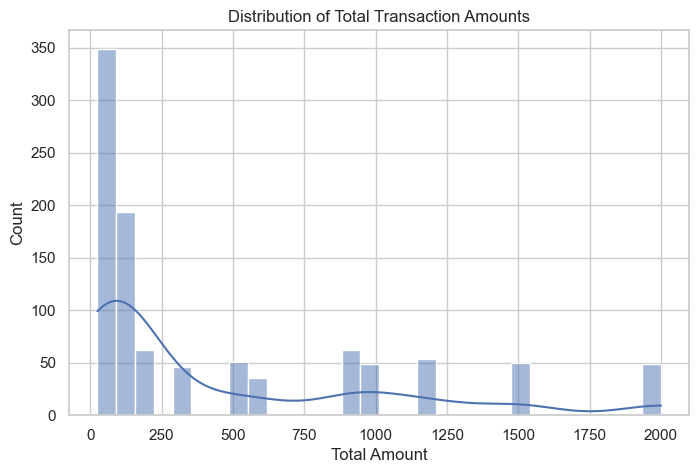

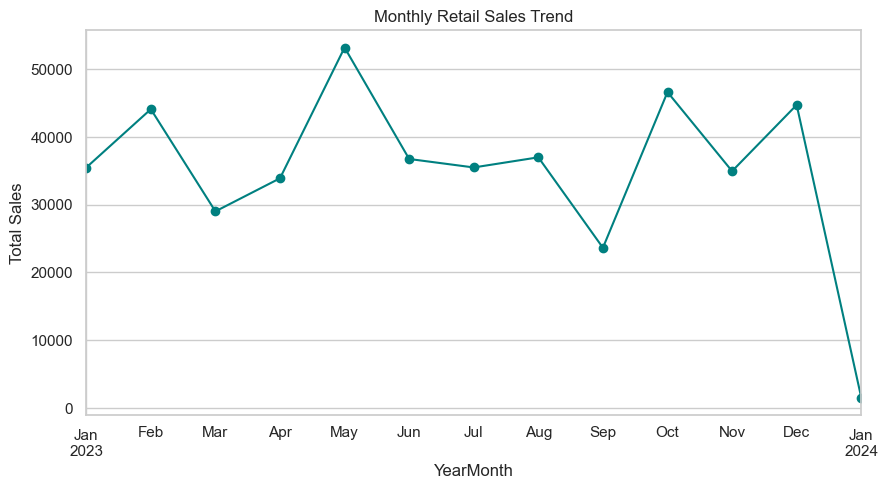

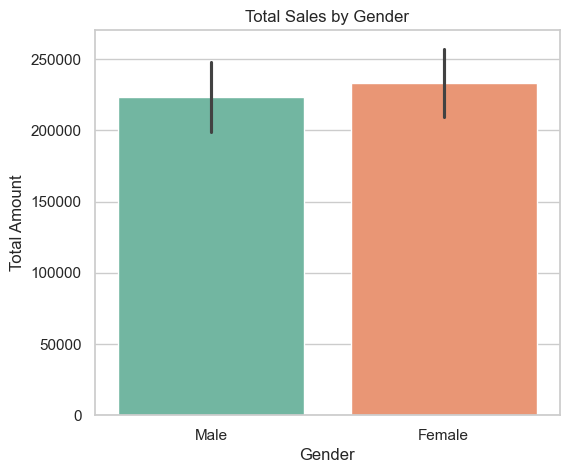

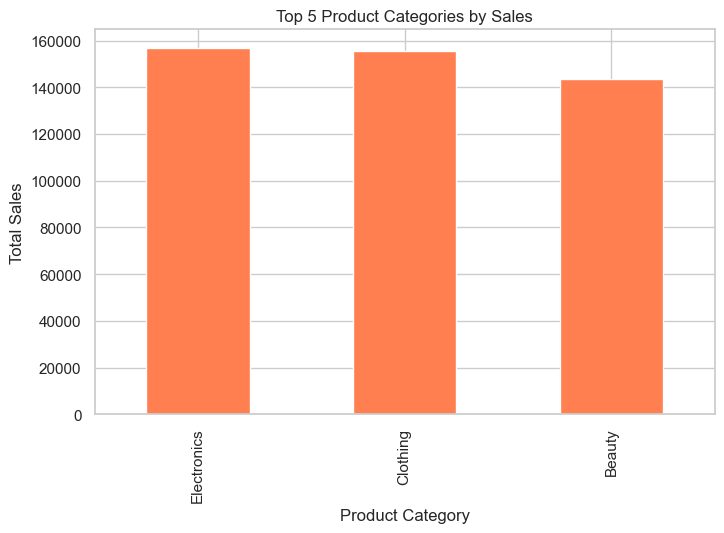

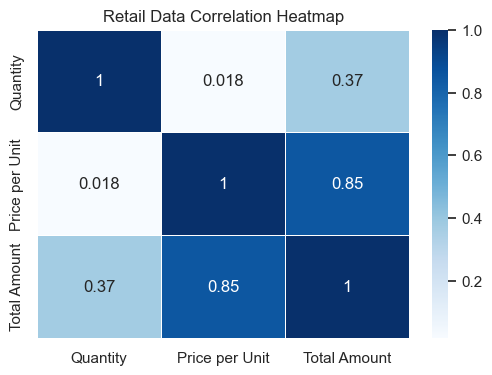


===== McDonald's Menu Data Overview =====
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Tra

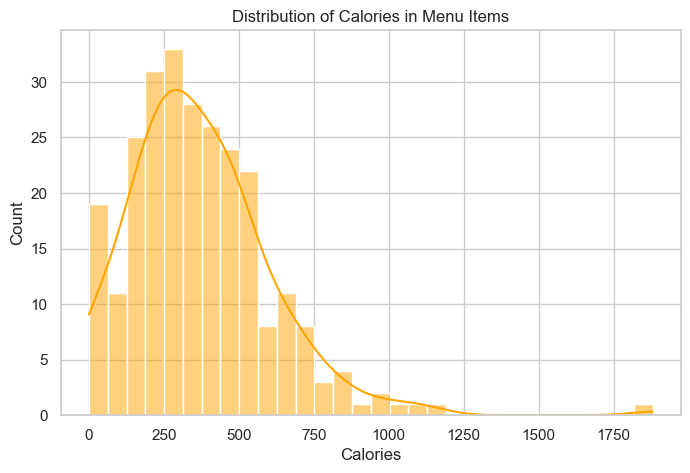

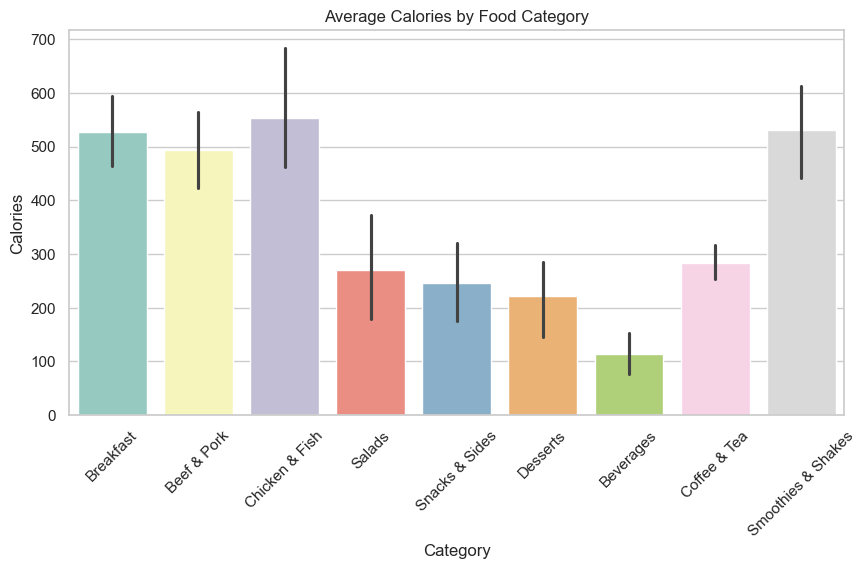

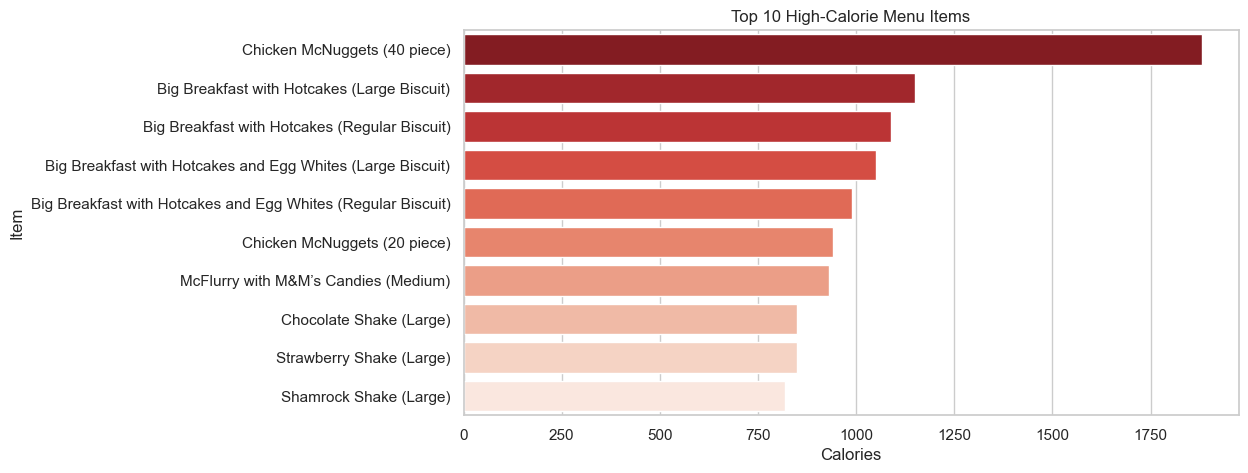

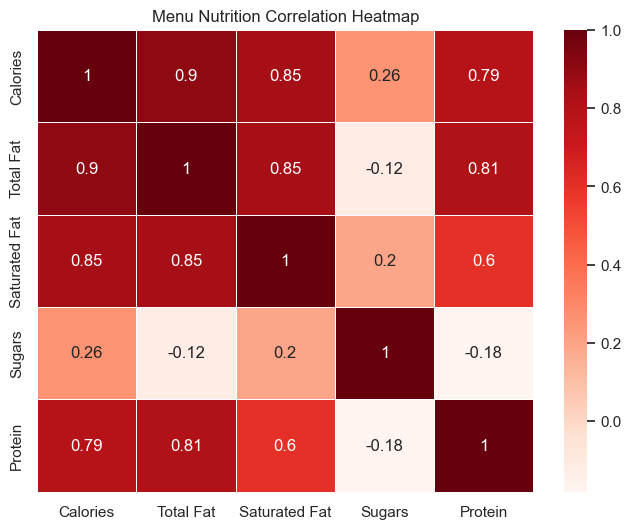


===== 📌 SUMMARY & INSIGHTS =====

Retail Sales Insights:
1. Clothing and Electronics generate the highest sales volume.
2. Male customers dominate transactions, but Female customers contribute significantly.
3. Monthly sales show seasonal fluctuations – stock management should align with demand.
4. Price per unit strongly influences total revenue (positive correlation).

McDonald's Menu Insights:
1. Certain items like biscuits and deluxe burgers are extremely high in calories.
2. Sugars and total calories are highly correlated – drinks/desserts may drive sugar spikes.
3. Protein-rich items can be marketed as 'healthier alternatives'.
4. Clear calorie labeling could improve customer perception and responsible choices.

===== ✅ End of Analysis =====


In [10]:
# ============================================================
# Oasis Internship Task: Dual Dataset Analysis
# 1. Retail Sales Dataset
# 2. McDonald's Nutrition Dataset
# ============================================================

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")  # Modern seaborn style

# ============================================================
# 1️⃣ RETAIL SALES DATA ANALYSIS
# ============================================================

# Load retail dataset
retail = pd.read_csv("retail_sales_dataset.csv")

print("\n===== Retail Sales Data Overview =====")
print(retail.head())
print(retail.info())

# Data Cleaning
retail.drop_duplicates(inplace=True)
retail['Date'] = pd.to_datetime(retail['Date'], errors='coerce')
retail['Quantity'] = pd.to_numeric(retail['Quantity'], errors='coerce')
retail['Price per Unit'] = pd.to_numeric(retail['Price per Unit'], errors='coerce')
retail['Total Amount'] = pd.to_numeric(retail['Total Amount'], errors='coerce')

# Missing values
print("\nMissing Values (Retail):")
print(retail.isnull().sum())

# ===================== Descriptive Stats =====================
print("\nRetail Dataset Statistics:")
print(retail[['Quantity','Price per Unit','Total Amount']].describe())

# Distribution of Total Amount
plt.figure(figsize=(8,5))
sns.histplot(retail['Total Amount'], bins=30, kde=True)
plt.title("Distribution of Total Transaction Amounts")
plt.show()

# Monthly Sales Trend
retail['YearMonth'] = retail['Date'].dt.to_period('M')
monthly_sales = retail.groupby('YearMonth')['Total Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color="teal")
plt.title("Monthly Retail Sales Trend")
plt.ylabel("Total Sales")
plt.show()

# Sales by Gender
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Total Amount", data=retail, estimator=sum, palette="Set2")
plt.title("Total Sales by Gender")
plt.show()

# Top 5 Product Categories
top_categories = retail.groupby("Product Category")['Total Amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_categories.plot(kind='bar', color="coral")
plt.title("Top 5 Product Categories by Sales")
plt.ylabel("Total Sales")
plt.show()

# ===================== Heatmap =====================
plt.figure(figsize=(6,4))
sns.heatmap(retail[['Quantity','Price per Unit','Total Amount']].corr(),
            annot=True, cmap="Blues", linewidths=0.5)
plt.title("Retail Data Correlation Heatmap")
plt.show()


# ============================================================
# 2️⃣ MCDONALD'S NUTRITION DATA ANALYSIS
# ============================================================

# Load McDonald's menu dataset
menu = pd.read_csv("menu.csv")

print("\n===== McDonald's Menu Data Overview =====")
print(menu.head())
print(menu.info())

# Data Cleaning
menu.drop_duplicates(inplace=True)

# Missing values
print("\nMissing Values (Menu):")
print(menu.isnull().sum())

# ===================== Descriptive Stats =====================
print("\nMenu Dataset Statistics:")
print(menu[['Calories','Total Fat','Saturated Fat','Sugars','Protein']].describe())

# Distribution of Calories
plt.figure(figsize=(8,5))
sns.histplot(menu['Calories'], bins=30, kde=True, color="orange")
plt.title("Distribution of Calories in Menu Items")
plt.show()

# Average Calories by Category
plt.figure(figsize=(10,5))
sns.barplot(x="Category", y="Calories", data=menu, estimator=np.mean, palette="Set3")
plt.xticks(rotation=45)
plt.title("Average Calories by Food Category")
plt.show()

# Top 10 High Calorie Items
top_calories = menu[['Item','Calories']].sort_values(by='Calories', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x="Calories", y="Item", data=top_calories, palette="Reds_r")
plt.title("Top 10 High-Calorie Menu Items")
plt.show()

# ===================== Correlation Heatmap =====================
plt.figure(figsize=(8,6))
sns.heatmap(menu[['Calories','Total Fat','Saturated Fat','Sugars','Protein']].corr(),
            annot=True, cmap="Reds", linewidths=0.5)
plt.title("Menu Nutrition Correlation Heatmap")
plt.show()


# ============================================================
# 3️⃣ SUMMARY & RECOMMENDATIONS
# ============================================================

print("\n===== 📌 SUMMARY & INSIGHTS =====")

print("\nRetail Sales Insights:")
print("1. Clothing and Electronics generate the highest sales volume.")
print("2. Male customers dominate transactions, but Female customers contribute significantly.")
print("3. Monthly sales show seasonal fluctuations – stock management should align with demand.")
print("4. Price per unit strongly influences total revenue (positive correlation).")

print("\nMcDonald's Menu Insights:")
print("1. Certain items like biscuits and deluxe burgers are extremely high in calories.")
print("2. Sugars and total calories are highly correlated – drinks/desserts may drive sugar spikes.")
print("3. Protein-rich items can be marketed as 'healthier alternatives'.")
print("4. Clear calorie labeling could improve customer perception and responsible choices.")

print("\n===== ✅ End of Analysis =====")
